# 1. Import packages 

In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# import sys
# !conda list Check the packages installed

# 2. Import Data

In [2]:
df_CO2 = pd.read_parquet('/kaggle/input/dioxydedecarbone/df_CO2.gzip') 

print( df_CO2.shape)

df_CO2.shape

(1563, 41)


(1563, 41)

# 3. Visualize the data using seaborn Pairplots

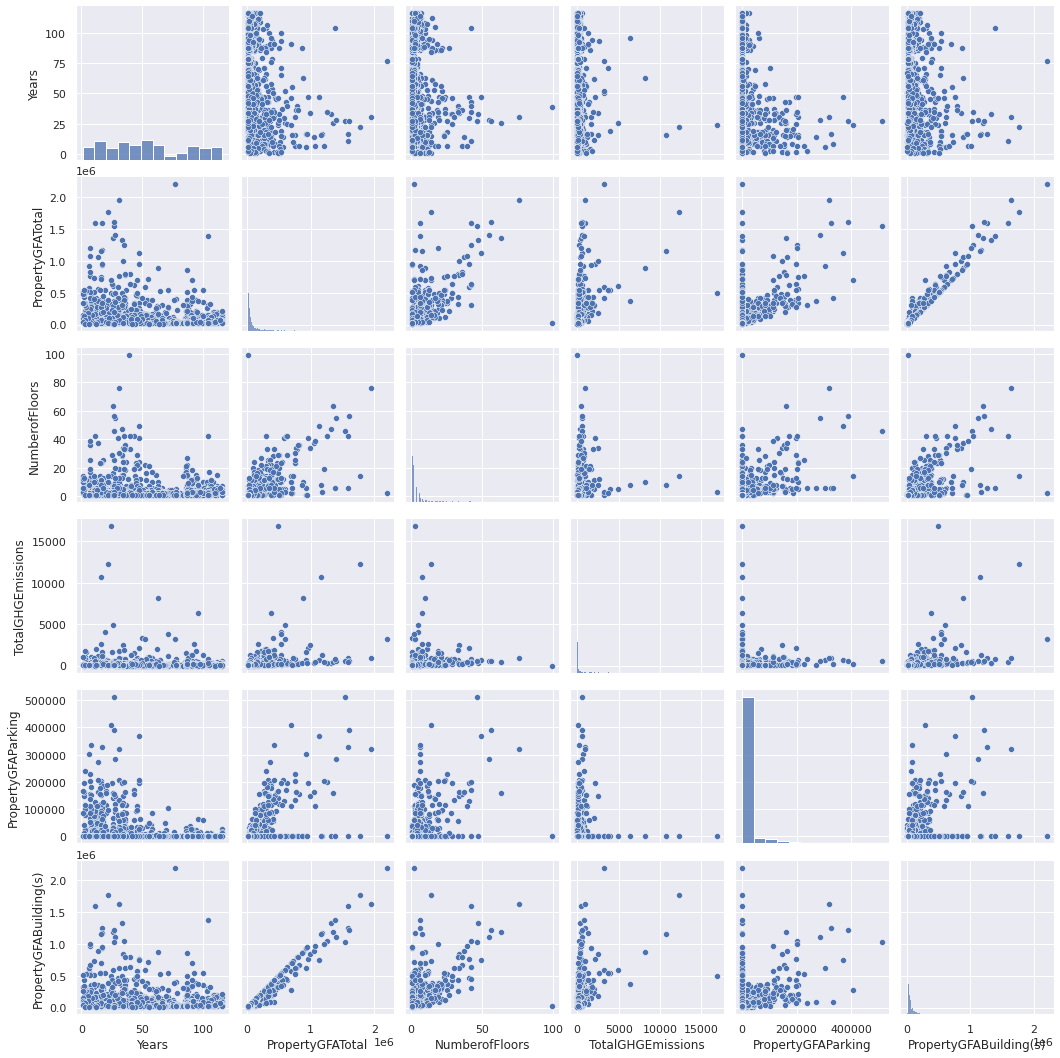

In [3]:
# Example 1 - Visualize the data using seaborn Pairplots

g = sns.pairplot(df_CO2[['Years', 'PropertyGFATotal', 'NumberofFloors', 'TotalGHGEmissions', 'PropertyGFAParking', 'PropertyGFABuilding(s)']])

# Supression des variables trés corrélées

In [4]:
df_CO2 = df_CO2.drop(['PropertyGFABuilding(s)'], axis=1)

# 4. Verifier Distribution avant passage a log

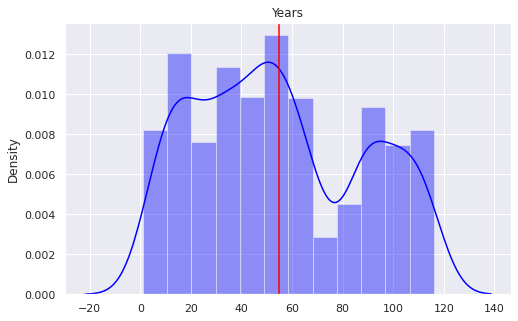

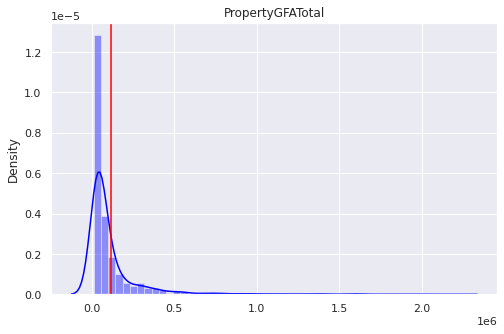

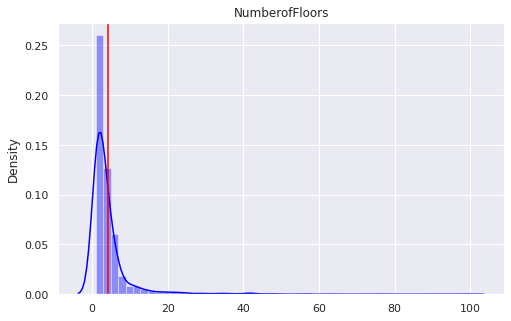

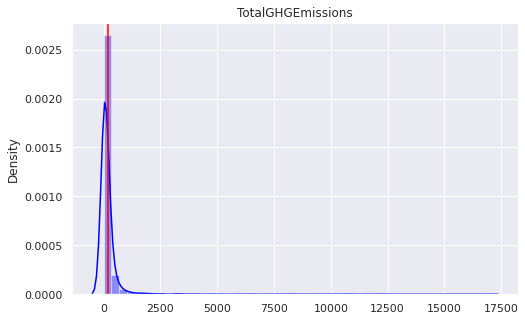

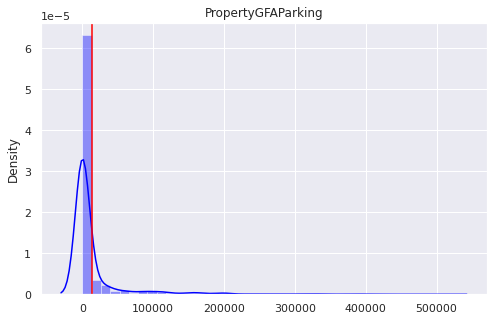

In [5]:
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})


for n in df_CO2[['Years', 'PropertyGFATotal', 'NumberofFloors', 'TotalGHGEmissions','PropertyGFAParking']]:
    x = df_CO2[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = df_CO2[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

# 5. Selecting the important features

In [6]:
df_CO2.head()

,Years,PropertyGFATotal,NumberofFloors,TotalGHGEmissions,PropertyGFAParking,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingType_NonResidential,BuildingType_Nonresidential COS,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,89,88434,12,249.98,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,103566,11,295.86,15064,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,47,956110,41,2089.28,196718,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,90,61320,10,286.43,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,36,175580,18,505.01,62000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


# 6. Passage ao Log

In [7]:
# df_CO2[['PropertyGFATotal', 'NumberofFloors', 'TotalGHGEmissions', 'PropertyGFAParking', 'PropertyGFABuilding(s)']] = df_CO2[['PropertyGFATotal', 'NumberofFloors', 'TotalGHGEmissions', 'PropertyGFAParking', 'PropertyGFABuilding(s)']]
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
df_CO2[['PropertyGFATotal', 'NumberofFloors', 'TotalGHGEmissions','PropertyGFAParking']] = transformer.fit_transform(df_CO2[['PropertyGFATotal', 'NumberofFloors', 'TotalGHGEmissions','PropertyGFAParking']])
#https://discuss.analyticsvidhya.com/t/methods-to-deal-with-zero-values-while-performing-log-transformation-of-variable/2431

In [8]:
df_CO2

,Years,PropertyGFATotal,NumberofFloors,TotalGHGEmissions,PropertyGFAParking,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingType_NonResidential,BuildingType_Nonresidential COS,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,89,11.390023,2.564949,5.525373,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,11.547974,2.484907,5.693261,9.620129,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,47,13.770629,3.737670,7.645053,12.189532,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,90,11.023878,2.397895,5.660979,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,36,12.075856,2.944439,6.226556,11.034906,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,26,9.416948,0.693147,3.088311,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3372,12,9.680406,0.693147,3.501646,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3373,42,9.484785,0.693147,5.414054,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3374,27,9.554072,0.693147,3.140265,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


# 7. Verifier distribution apres passage au log

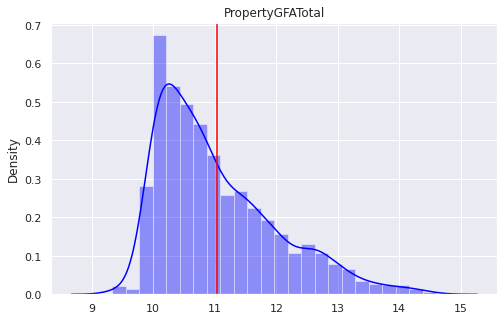

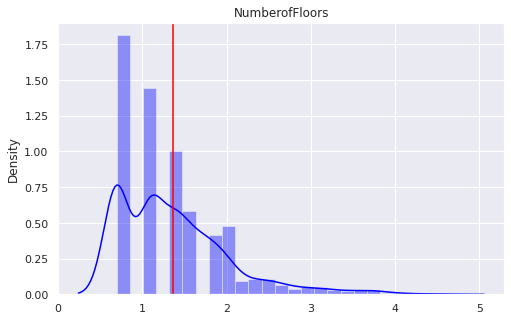

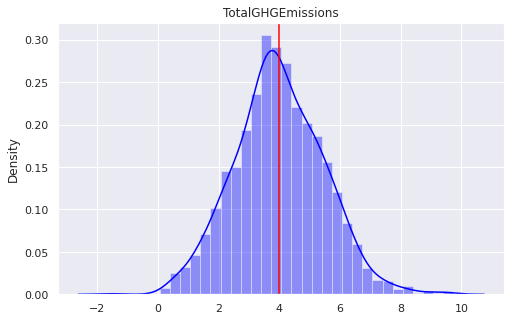

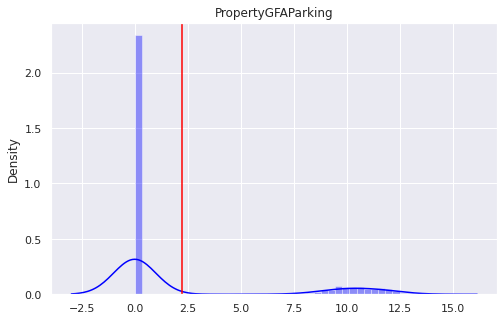

In [9]:
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})


for n in df_CO2[['PropertyGFATotal', 'NumberofFloors', 'TotalGHGEmissions','PropertyGFAParking']]:
    x = df_CO2[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = df_CO2[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

In [10]:
# vérifier les statistiques rapides df ()
df_CO2.describe().head()

,Years,PropertyGFATotal,NumberofFloors,TotalGHGEmissions,PropertyGFAParking,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingType_NonResidential,BuildingType_Nonresidential COS,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
count,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000
mean,54.763916,11.032088,1.362233,3.987028,2.233651,0.006398,0.048624,0.027511,0.006398,0.110685,0.001919,0.024952,0.072297,0.001919,0.157390,0.007678,0.013436,0.007678,0.058221,0.017914,0.012796,0.186180,0.024952,0.014075,0.119642,0.045425,0.930902,0.054383,0.030710,0.025592,0.229687,0.074856,0.214331,0.091491,0.091491,0.037748,0.074856,0.048624,0.020473,0.020473
std,32.927285,0.963283,0.658623,1.473596,4.326063,0.079756,0.215150,0.163620,0.079756,0.313842,0.043783,0.156029,0.259062,0.043783,0.364284,0.087313,0.115168,0.087313,0.234237,0.132682,0.112429,0.389377,0.156029,0.117840,0.324646,0.208302,0.253702,0.226844,0.172587,0.157965,0.420766,0.263243,0.410489,0.288398,0.288398,0.190647,0.263243,0.215150,0.141658,0.141658
min,1.000000,9.331318,0.693147,-1.609438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,10.268165,0.693147,3.034472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
df_CO2.shape

(1563, 40)

In [12]:
df_CO2.columns

Index(['Years', 'PropertyGFATotal', 'NumberofFloors', 'TotalGHGEmissions',
       'PropertyGFAParking', 'PrimaryPropertyType_Hospital',
       'PrimaryPropertyType_Hotel', 'PrimaryPropertyType_K-12 School',
       'PrimaryPropertyType_Laboratory', 'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Low-Rise Multifamily',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Office',
       'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Senior Care Community',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'PrimaryPropertyType_Supermarket / Grocery Store',
       'PrimaryPropertyType_University', 'PrimaryPropertyType_Warehouse',
       'PrimaryPropertyType_Worship 

In [13]:
# Standardisation de donnes 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_CO2)

In [14]:
df = standardized_data

In [15]:
df = pd.DataFrame(df, columns = ['Years', 'PropertyGFATotal', 'NumberofFloors', 'PropertyGFAParking',
       'TotalGHGEmissions', 'PrimaryPropertyType_Hospital',
       'PrimaryPropertyType_Hotel', 'PrimaryPropertyType_K-12 School',
       'PrimaryPropertyType_Laboratory', 'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Low-Rise Multifamily',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Office',
       'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Senior Care Community',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'PrimaryPropertyType_Supermarket / Grocery Store',
       'PrimaryPropertyType_University', 'PrimaryPropertyType_Warehouse',
       'PrimaryPropertyType_Worship Facility', 'BuildingType_NonResidential',
       'BuildingType_Nonresidential COS', 'Neighborhood_CENTRAL',
       'Neighborhood_DELRIDGE', 'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER DUWAMISH', 'Neighborhood_LAKE UNION',
       'Neighborhood_MAGNOLIA / QUEEN ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST'])


# 8. Split X et Y

In [16]:
# Split the data into X & y

X = df.drop(['TotalGHGEmissions'], axis = 1)
X_columns = df.drop(['TotalGHGEmissions'], axis = 1)
y = df['TotalGHGEmissions'].astype(int)

print(X.shape)
print(y.shape)

(1563, 39)
(1563,)


In [17]:
X

,Years,PropertyGFATotal,NumberofFloors,PropertyGFAParking,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingType_NonResidential,BuildingType_Nonresidential COS,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,1.040081,0.371697,1.826690,1.044274,-0.080244,4.423323,-0.168195,-0.080244,-0.35279,-0.043853,-0.15997,-0.279161,-0.043853,-0.432190,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573
1,-1.056116,0.535721,1.705121,1.158241,-0.080244,4.423323,-0.168195,-0.080244,-0.35279,-0.043853,-0.15997,-0.279161,-0.043853,-0.432190,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573
2,-0.235865,2.843835,3.607823,2.483175,-0.080244,4.423323,-0.168195,-0.080244,-0.35279,-0.043853,-0.15997,-0.279161,-0.043853,-0.432190,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573
3,1.070461,-0.008526,1.572968,1.136327,-0.080244,4.423323,-0.168195,-0.080244,-0.35279,-0.043853,-0.15997,-0.279161,-0.043853,-0.432190,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573
4,-0.570042,1.083899,2.403061,1.520258,-0.080244,4.423323,-0.168195,-0.080244,-0.35279,-0.043853,-0.15997,-0.279161,-0.043853,-0.432190,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,0.272446,-0.239813,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,-0.873838,-1.677240,-1.016211,-0.610075,-0.080244,-0.226074,-0.168195,-0.080244,-0.35279,-0.043853,-0.15997,-0.279161,22.803509,-0.432190,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,-3.670453,4.169920,-0.177998,-0.162062,-0.546052,-0.284452,1.914594,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573
1559,-1.299154,-1.403652,-1.016211,-0.329491,-0.080244,-0.226074,-0.168195,-0.080244,-0.35279,-0.043853,-0.15997,-0.279161,-0.043853,2.313797,-0.08796,-0.116699,-0.08796,-0.248638,-0.135059,-0.11385,-0.478303,-0.15997,-0.119484,-0.368648,-0.218145,-3.670453,4.169920,-0.177998,-0.162062,1.831328,-0.284452,-0.522304,-0.317339,-0.317339,-0.198062,-0.284452,-0.226074,-0.144573,-0.144573
1560,-0.387764,-1.606795,-1.

In [18]:
y.value_counts()

0    1230
1     207
2     126
Name: TotalGHGEmissions, dtype: int64

# 9.  K Fold Cross validation plusieurs modèles 

<class 'sklearn.tree._classes.DecisionTreeClassifier'> [0.785942 0.763578 0.805112 0.766026 0.775641]
<class 'sklearn.tree._classes.DecisionTreeClassifier'> 0.7792598509052182



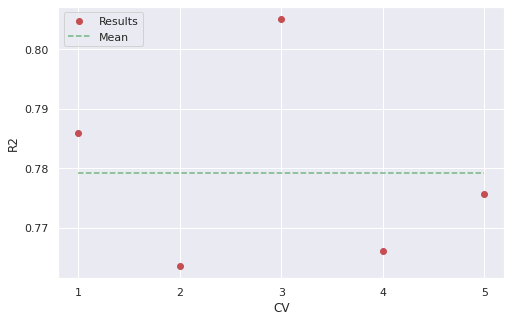

<class 'sklearn.linear_model._base.LinearRegression'> [0.427104 0.410930 0.437296 0.487661 0.269092]
<class 'sklearn.linear_model._base.LinearRegression'> 0.4064164523186541



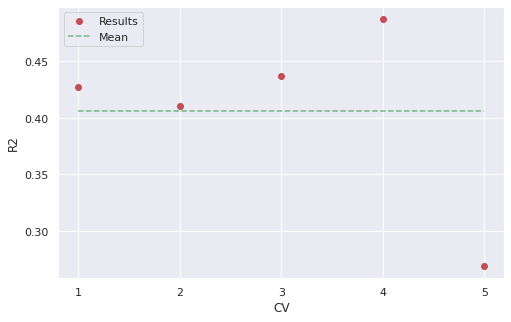

<class 'sklearn.linear_model._ridge.Ridge'> [0.427358 0.410794 0.437434 0.487602 0.269332]
<class 'sklearn.linear_model._ridge.Ridge'> 0.4065038846174696



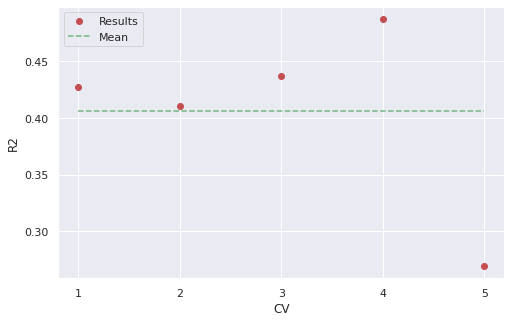

<class 'sklearn.linear_model._coordinate_descent.Lasso'> [-0.000037 -0.003933 -0.002059 -0.015651 -0.019299]
<class 'sklearn.linear_model._coordinate_descent.Lasso'> -0.008195752004609069



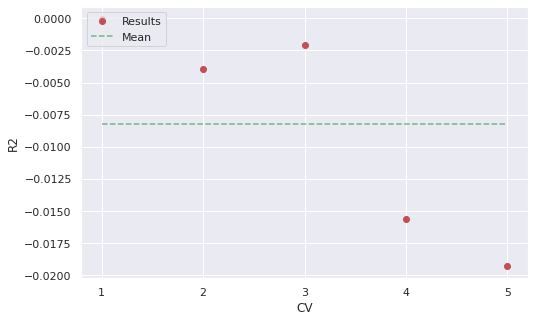

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'> [0.453218 0.486163 0.473045 0.563211 0.303420]
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'> 0.45581142943131925



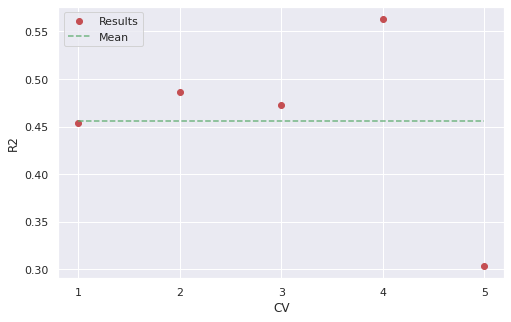

<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'> [0.382436 0.439015 0.478946 0.482846 0.166823]
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'> 0.390013418150278



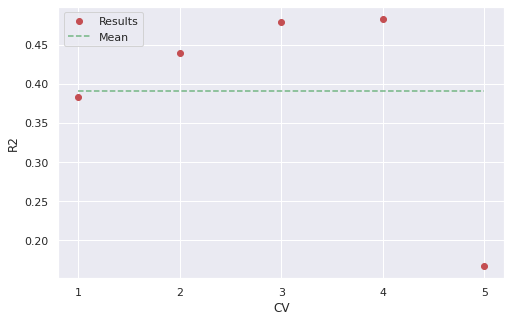

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve


#retrieve the model to be evaluate
model_dict = {'dt': DecisionTreeClassifier, 'lm': LinearRegression, 'ridge' : Ridge, 'lasso': Lasso, 'gbr': GradientBoostingRegressor, 'mlpregr': MLPRegressor, }

# Create range of values for parameter
param_range = np.arange(1, 200, 2)


for i in model_dict.values():
    
    # configurer la procedure cross-validaion
    kfold_validation=KFold(n_splits=5, shuffle=True, random_state=10)

    output = i()
    
    #definir les resultats 
    results=cross_val_score(output,X,y,cv=kfold_validation)
    
    
    print(f'{i}', results)
    print(f'{i}', np.mean(results))
    print('')


    fig, ax = plt.subplots()
    Results = results
    Mean = [np.mean(results)]*len(results)
    
    # Plot les donnees
    plt.plot(Results, 'ro', label='Results', marker='o')
    
    # Plot the average line
    plt.plot(Mean, 'g', label='Mean', linestyle='--', alpha=.8)
    

    plt.xticks(np.arange(len(Results)), np.arange(1, len(Results)+1))
    
    # Make a legend
    ax.legend(loc = 'upper left')
    ax.set_xlabel("CV")
    ax.set_ylabel("R2")
    plt.show()


# 10. Scoring plusieurs modèles

In [20]:
# import libraries 
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn import tree, model_selection
import math


# models 
LR = linear_model.LinearRegression ()
LASSO = linear_model.Lasso ()
RIDGE = linear_model.Ridge ()
DTR = DecisionTreeRegressor ()
REG = GradientBoostingRegressor ()
MLPR = MLPRegressor ()


kf = model_selection.KFold(n_splits=5,shuffle=True, random_state=10)


# MSE = np.square(np.subtract(X,y)).mean() 
 
# RMSE = math.sqrt(MSE)

#RMSE -> Root Mean Square Error/Erreur quadratique moyenne -> (Des valeurs inférieures de RMSE indiquent un meilleur ajustement)
%time
print('')
print('RMSE')
print('')
print(f" Linear Regression chaque plis: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='neg_mean_squared_error')}")
print(f" Moyenne, Linear Regression: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='neg_mean_squared_error').mean()}")
print(f" Standard Deviation, Linear Regression: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='neg_mean_squared_error').std()}")
print('')

print(f" Lasso chaque plis: {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='neg_mean_squared_error')}")
print(f" Moyenne, Lasso : {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='neg_mean_squared_error').mean()}")
print(f" Standard Deviation, Lasso : {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='neg_mean_squared_error').std()}")
print('')

print(f" Ridge chaque plis: {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='neg_mean_squared_error')}")
print(f" Moyenne, Ridge : {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='neg_mean_squared_error').mean()}")
print(f" Standard Deviation, Ridge : {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='neg_mean_squared_error').std()}")
print('')

print(f" Decision Tree chaque plis: {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='neg_mean_squared_error')}")
print(f" Moyenne, Decision Tree : {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='neg_mean_squared_error').mean()}")
print(f" Standard Deviation, Decision Tree : {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='neg_mean_squared_error').std()}")
print('')

print(f" GradientBoostingRegressor chaque plis: {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='neg_mean_squared_error')}")
print(f" Moyenne, GradientBoostingRegressor : {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='neg_mean_squared_error').mean()}")
print(f" Standard Deviation, GradientBoostingRegressor : {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='neg_mean_squared_error').std()}")
print('')

print(f" MLPRegressor chaque folds: {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_squared_error')}")
print(f" Moyenne, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_squared_error').mean()}")
print(f" Standard Deviation, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_squared_error').std()}")
print ('')

#MAE -> mean of absolute error values/ average of the absolute error values (plus proche de 0 le meilleur)
%time
print('')
print('MAE')
print('')
print(f" Linear Regression chaque plis: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='neg_mean_absolute_error')}")
print(f" Moyenne, Regression Linear: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()}")
print(f" Standard Deviation, Regression Linear: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='neg_mean_absolute_error').std()}")
print('')

print(f" MAE Lasso chaque plis: {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='neg_mean_absolute_error')}")
print(f" Moyenne, Lasso : {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()}")
print(f" Standard Deviation, Lasso : {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='neg_mean_absolute_error').std()}")
print('')


print(f" Ridge chaque plis: {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='neg_mean_absolute_error')}")
print(f" Moyenne, Ridge : {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()}")
print(f" Standard Deviation, Ridge : {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='neg_mean_absolute_error').std()}")
print('')

print(f" l'Arbre de décision chaque plis: {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='neg_mean_absolute_error')}")
print(f" Moyenne, l'Arbre de décision : {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()}")
print(f" Standard Deviation, l'Arbre de décision : {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='neg_mean_absolute_error').std()}")
print('')

print(f" GradientBoostingRegressor chaque plis: {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='neg_mean_absolute_error')}")
print(f" Moyenne, GradientBoostingRegressor : {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()}")
print(f" Standard Deviation, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_absolute_error').std()}")
print('')

print(f" MLPRegressor chaque plis: {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_absolute_error')}")
print(f" Moyen, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()}")
print(f" Standard Deviation, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='neg_mean_absolute_error').std()}")
print ('')
      
#r2 -> coefficient of determination/coefficient de détermination (The closer the value of r-square to 1, the better is the model fitted)
%time
print('')
print('R2')
print('')
print(f" Linear Regression chaque plis: {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='r2')}")
print(f" Moyenne Linear, Regression : {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='r2').mean()}")
print(f" Standard Deviation, Linear Regression : {model_selection.cross_val_score(LR, X, y, cv=kf, scoring='r2').std()}")
print('')

print(f" Lasso chaque plis: {model_selection.cross_val_score(LASSO, X, y, cv=kf, scoring='r2')}")
print(f" Moyenne, Lasso : {cross_val_score(LASSO, X, y, cv=kf, scoring='r2').mean()}")
print(f" Standard Deviation, Lasso : {cross_val_score(LASSO, X, y, cv=kf, scoring='r2').std()}")
print('')

print(f" Ridge chaque plis: {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='r2')}")
print(f" Moyenne,Ridge : {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='r2').mean()}")
print(f" Standard Deviation, Ridge : {model_selection.cross_val_score(RIDGE, X, y, cv=kf, scoring='r2').std()}")
print('')

print(f" Arbre de décision chaque plis: {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='r2')}")
print(f" Moyenne, Arbre de décision : {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='r2').mean()}")
print(f" Standard Deviation, Arbre de décision : {model_selection.cross_val_score(DTR, X, y, cv=kf, scoring='r2').std()}")
print('')

print(f" GradientBoostingRegressor chaque plis: {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='r2')}")
print(f" Moyenne, GradientBoostingRegressor : {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='r2').mean()}")
print(f" Standard Deviation, GradientBoostingRegressor : {model_selection.cross_val_score(REG, X, y, cv=kf, scoring='r2').std()}")
print('')

print(f" MLPRegressor chaque plis: {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='r2')}")
print(f" Moyenne, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='r2').mean()}")
print(f" Standard Deviation, MLPRegressor : {model_selection.cross_val_score(MLPR, X, y, cv=kf, scoring='r2').std()}")
# print(f" KNeighbors : {np.sqrt(-cross_val_score(KNR,X,Y,cv=kf,scoring='neg_mean_squared_error').mean())}")

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 5.96 µs

RMSE

 Linear Regression chaque plis: [-0.209653 -0.190065 -0.218766 -0.239869 -0.210651]
 Moyenne, Linear Regression: -0.21380092344752746
 Standard Deviation, Linear Regression: 0.01609174627769816

 Lasso chaque plis: [-0.365966 -0.323922 -0.389577 -0.475512 -0.293767]
 Moyenne, Lasso : -0.3697487772855291
 Standard Deviation, Lasso : 0.06239673821412203

 Ridge chaque plis: [-0.209560 -0.190109 -0.218712 -0.239897 -0.210582]
 Moyenne, Ridge : -0.2137720690933122
 Standard Deviation, Ridge : 0.016092084141980253

 Decision Tree chaque plis: [-0.421725 -0.380192 -0.271565 -0.362179 -0.358974]
 Moyenne, Decision Tree : -0.34613131809617437
 Standard Deviation, Decision Tree : 0.014096570495251395

 GradientBoostingRegressor chaque plis: [-0.200033 -0.161533 -0.202896 -0.202005 -0.201360]
 Moyenne, GradientBoostingRegressor : -0.19495276878009854
 Standard Deviation, GradientBoostingRegressor : 0.016751980064922938

 

In [21]:
import time

# 11. Hyperparameter tunning 

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC # LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# warnings.filterwarnings('ignore')
# warnings.simplefilter('ignore')
# warnings.simplefilter("ignore", UserWarning)
# # warnings.warn("once")
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils import parallel_backend

# Add a dict of estimator and estimator related parameters in this list
parameters_grid = [
                    {'estimator': [linear_model.Lasso()], 
                     'estimator__alpha': [0.1],
                     'estimator__fit_intercept': [True]},
    
                    {'estimator': [linear_model.LinearRegression()], 
                     'estimator__fit_intercept': [True, False]},
                

                    {'estimator': [linear_model.Ridge()], 
                     'estimator__alpha': [1, 0.1, 0.01, 0.001, 10],
                     'estimator__fit_intercept': [True, False]},
    
                    {'estimator': [GradientBoostingRegressor()], 
                     'estimator__loss':["ls", "lad","huber"],
                     'estimator__learning_rate':[0.005,0.01,0.02],
                     'estimator__n_estimators':[10, 100],
                     'estimator__criterion': ["friedman_mse", "squared_error", "squared_error"]},

                   {'estimator': [MLPRegressor()],
                    'estimator__hidden_layer_sizes': [(10,20),(150,100,50), (120,80,40), (100,50,30)],
                    'estimator__max_iter': [200],
                    'estimator__activation': ['identity','logistic','tanh', 'relu'],
                    'estimator__solver': ['sgd','adam'],
                    'estimator__alpha': [0.0001, 0.01, 0.05],
                    'estimator__learning_rate': ['constant','invscaling','adaptive']},

                    {'estimator': [DecisionTreeRegressor()],
                     'estimator__splitter':["best","random"], 
                     'estimator__max_depth': [3,5,10], 
                     'estimator__max_features': ["auto","log2","sqrt",None]}, 


                    ]

estimators = []
scores = []
params = []

for ele in parameters_grid:
    if __name__ == "__main__":
        warnings.filterwarnings("ignore")
        grid = GridSearchCV(Pipeline(steps=[('estimator', ele['estimator'][0])]),param_grid={key:value for key, value in ele.items() if key != 'estimator'},cv = 3, n_jobs=-1, scoring='r2')
        with parallel_backend('multiprocessing'):
            grid.fit(X,y)
        Estimator = str(ele['estimator'])
        Best_Params = str(grid.best_params_)
        Best_Score = str(grid.best_score_)
        estimators.append(Estimator)
        scores.append(Best_Score)
        params.append(Best_Params)
        z = max(scores)
        index = scores.index(z)
        model = estimators[index]
        par = params[index]
    print('Estimator: ' + str(ele['estimator']))
    print('Best Params: ' + str(grid.best_params_))
    print('Best Score: ' + str(grid.best_score_))
    print('')
    print('')

print('The Best Estimator and Score is {} {} {}' .format(model, par, max(scores)))


Estimator: [Lasso()]
Best Params: {'estimator__alpha': 0.1, 'estimator__fit_intercept': True}
Best Score: 0.08670067645778634


Estimator: [LinearRegression()]
Best Params: {'estimator__fit_intercept': True}
Best Score: 0.19586264045741864


Estimator: [Ridge()]
Best Params: {'estimator__alpha': 10, 'estimator__fit_intercept': True}
Best Score: 0.20097246107663777


Estimator: [GradientBoostingRegressor()]
Best Params: {'estimator__criterion': 'squared_error', 'estimator__learning_rate': 0.02, 'estimator__loss': 'ls', 'estimator__n_estimators': 100}
Best Score: 0.22271132447369124


Estimator: [MLPRegressor()]
Best Params: {'estimator__activation': 'logistic', 'estimator__alpha': 0.01, 'estimator__hidden_layer_sizes': (150, 100, 50), 'estimator__learning_rate': 'adaptive', 'estimator__max_iter': 200, 'estimator__solver': 'adam'}
Best Score: 0.31277036591072743


Estimator: [DecisionTreeRegressor()]
Best Params: {'estimator__max_depth': 5, 'estimator__max_features': 'auto', 'estimator__

# 12. Shap Values

  0%|          | 0/1563 [00:00<?, ?it/s]

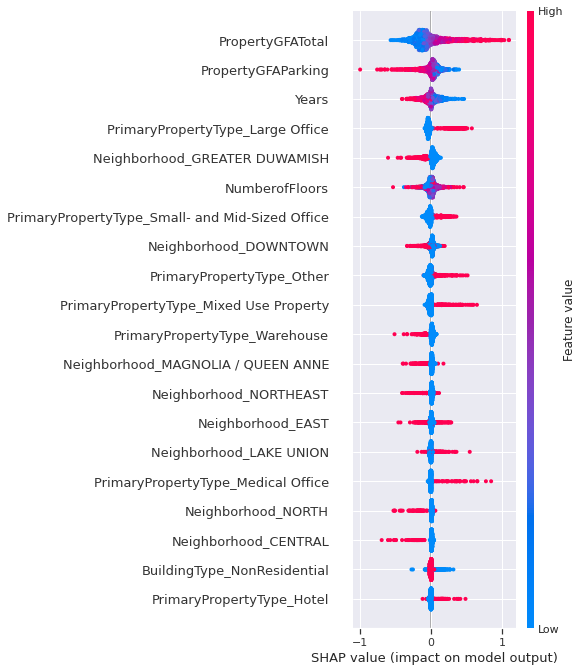

In [23]:
import sklearn
import shap
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor( alpha = 0.01, hidden_layer_sizes = (100, 50, 30), max_iter = 200, solver = 'adam', random_state=0).fit(X, y)


# explain the model's predictions using SHAP values
explainer = shap.KernelExplainer(nn.predict, X)  
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

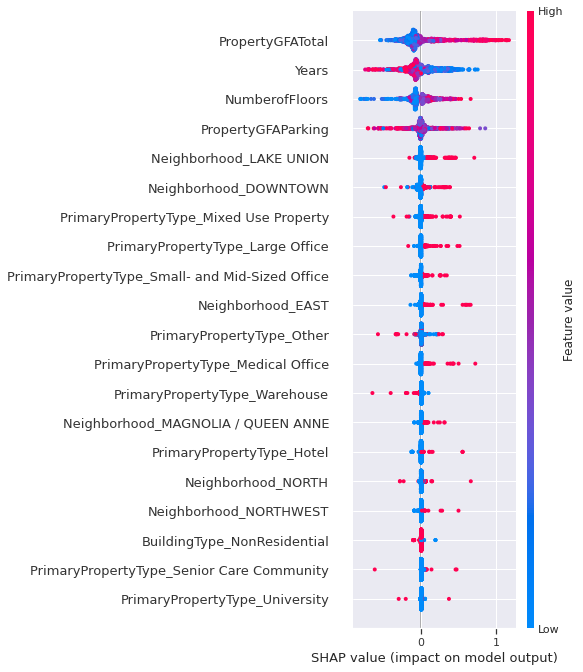

In [24]:
my_model = DecisionTreeRegressor(random_state=0).fit(X, y)

import shap
explainer = shap.TreeExplainer(my_model)  
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

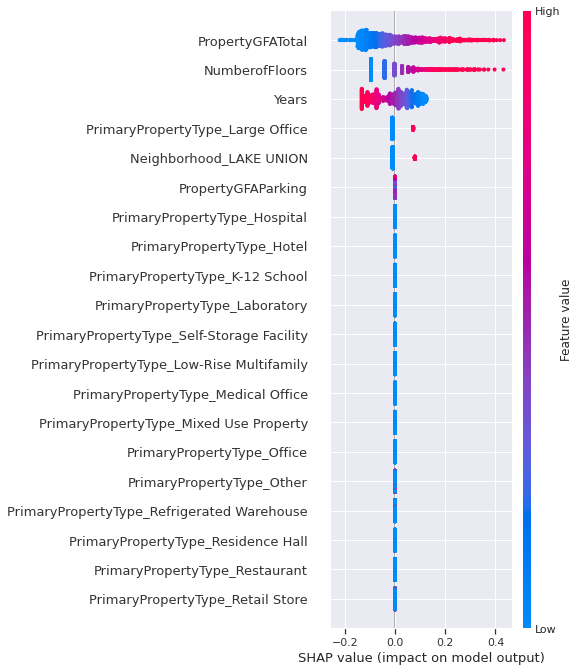

In [25]:
import sklearn
import shap
from sklearn.linear_model import LinearRegression
import numpy as np

  # train linear model
my_model =  sklearn.linear_model.Lasso(alpha=0.1, fit_intercept= True, random_state=0).fit(X, y)

# explain the model's predictions using SHAP values
explainer = shap.LinearExplainer(my_model, X)  
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)


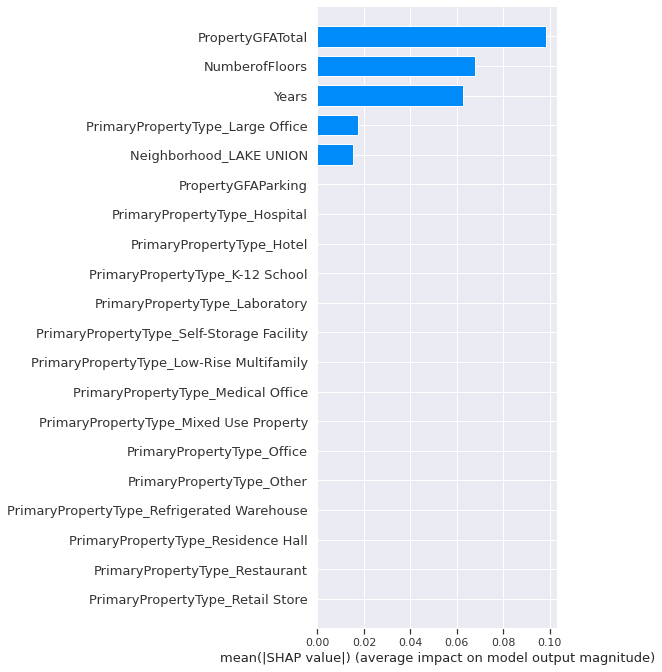

In [26]:
shap.summary_plot(shap_values, X, plot_type="bar")

- Feature importance: Variables are ranked in descending order.

- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.

- Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.

- Correlation: A high level of the “years” has a high and positive impact on the quality rating. The “high” comes from the red color, and the “positive” impact is shown on the X-axis.

In [27]:
# shap.dependence_plot("PrimaryPropertyType_Senior Care Community", shap_values, X)

The function automatically includes another variable that your chosen variable interacts most with. The following plot shows there is an approximately linear and negative trend between “Years” and the target variable, and “years” interacts with “Neighborhood_Greater Duwamish” frequently.

# 13. Best Model

In [28]:
import sklearn
from sklearn.tree import DecisionTreeClassifier

X = df_CO2.drop(['TotalGHGEmissions'], axis = 1).values
X_columns = df_CO2.drop(['TotalGHGEmissions'], axis = 1)
y = df_CO2['TotalGHGEmissions'].astype(int)

print(X.shape)
print(y.shape)


nn = MLPRegressor( alpha = 0.01, hidden_layer_sizes = (100, 50, 30), max_iter = 200, solver = 'adam', random_state=0).fit(X, y)
results=cross_val_score(nn,X,y,cv=3, scoring='r2')

print('The R2 is: ', np.mean(results))

#doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor


(1563, 39)
(1563,)
The R2 is:  0.3057843310911539


In [29]:
# Data = pd.read_csv('/kaggle/input/seattle1/2016_Building_Energy_Benchmarking.csv')

# Notes:

The accuracy score represents the coefficient of determination ( 𝑅2 ). This is at max 1, but can be negative. It will be 0 if you predict the mean of y for all observations.

The R Square is measure of how close the data are to the fitted regression line.

In this case we can say that our model explains 56% of the training data & 61% of the testing data

The RMSE is the standard deviation of the residuals. Residuals is the difference between the predicted value and the regression line. Hence RMSE is a measure of how spread your residuals are.

The mean absolute error (MAE) is the average of all the absolute errors. The absolute error is the difference between the true value (y_train) and the predicted value (y_pred).

Coeff are the weights

The intercept is the expected mean value of Y when all X=0